Sources :
https://otexts.com/fpp2/residuals.html
https://www.quantstart.com/articles/Generalised-Autoregressive-Conditional-Heteroskedasticity-GARCH-p-q-Models-for-Time-Series-Analysis/
https://github.com/statsmodels/statsmodels/issues/7456

In [17]:
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

In [18]:
cac40 = pd.read_html('https://en.wikipedia.org/wiki/CAC_40')[4]
cac40

,Company,Sector,GICS Sub-Industry,Ticker
0,Air Liquide,Basic Materials,Industrial Gases,AI.PA
1,Airbus,Industrials,Aerospace & Defense,AIR.PA
2,Alstom,Industrials,Rail Transport,ALO.PA
3,ArcelorMittal,Basic Materials,Steel,MT.AS
4,AXA,Financial Services,Life & Health Insurance,CS.PA
5,BNP Paribas,Financial Services,Diversified Banks,BNP.PA
6,Bouygues,Industrials,Construction & Engineering,EN.PA
7,Capgemini,Technology,IT Consulting & Other Services,CAP.PA
8,Carrefour,Consumer Defensive,Hypermarkets & Super Centers,CA.PA
9,Crédit Agricole,Financial Services,Regional Banks,ACA.PA


In [19]:
Tickers = cac40.iloc[[5], [3]]
symbols = Tickers['Ticker'].to_list()
symbols

['BNP.PA']

In [20]:
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

In [21]:
data_1 = yf.Ticker(symbols[0])
BNP = data_1.history(interval ='1d', start = '2021-5-24', end = '2023-5-24')

In [22]:
BNP = BNP[['Close']]
returns= np.log(BNP['Close'] / BNP['Close'].shift(1)).dropna() 

Text(0.5, 1.0, 'BNP returns')

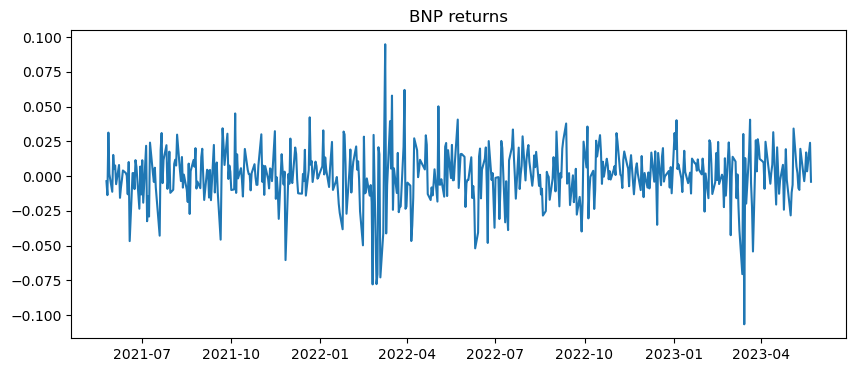

In [23]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.title('BNP returns')

In [24]:
returns.kurtosis()

3.4358158170442588

- the Series is Platykurtic (Kurtosis > 3)
- Volatility varies over time

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
adftest = adfuller(returns)

In [27]:
print('pvalue of adfuller test is :', adftest[1])

pvalue of adfuller test is : 0.0


In [28]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(returns, trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2543.060, Time=0.86 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-2548.354, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2546.881, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2546.895, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2550.180, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2544.915, Time=0.37 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.712 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  515
Model:                        SARIMAX   Log Likelihood                1276.090
Date:                Thu, 01 Jun 2023   AIC                          -2550.180
Time:                        13:36:32   BIC                          -2545.936
Sample:                             0   HQIC                         -2548.516
                                - 515                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0004   1.57e-05     26.230      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):               278.78
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                            -0.61
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARMA(0,0) model is made up of two parts:

- A Constant
- an error term

ARIMA(0,0,0):

- The I in ARIMA stands for integration. You have to integrate the time series I before applying the ARMA modell. So in our case you have to integrate it 0 times.

- An example for an ARIMA(0,0,0) modell is a time series only containing a **constant and white noise**, so for example a time series in which all values are the same is ARIMA(0,0,0)

**Split Data into Training and testing**

In [36]:
train = returns[:-77]
test = returns[-77:]

In [39]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(0,0,0))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  438
Model:                          ARIMA   Log Likelihood                1098.471
Date:                Thu, 01 Jun 2023   AIC                          -2192.942
Time:                        14:19:49   BIC                          -2184.778
Sample:                             0   HQIC                         -2189.721
                                - 438                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.528      0.598      -0.001       0.002
sigma2         0.0004   1.73e-05     22.475      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.82   Jarque-Bera (JB):               140.56
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.31
Prob(H) (two-sided):                  0.76   Kurtosis:                         5.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Prob(Q)** is the p-value associated with the null hypothesis that the residuals have no correlation structure. 

**Prob(JB)** is the p-value associated with the null hypothesis that the residuals are Gaussian normally distributed. 

If either of the p-values is less than 0.05 we reject that hypothesis.

The “residuals” in a time series model are what is left over after fitting a model.                                                      For many (but not all) time series models, the residuals are equal to the difference between the observations and the corresponding fitted values: et=yt−^yt.

Residuals are useful in checking whether a model has adequately captured the information in the data. A good forecasting method will yield residuals with the following properties:

- The residuals are uncorrelated. If there are correlations between residuals, then there is information left in the residuals which should be used in computing forecasts.

- The residuals have zero mean. If the residuals have a mean other than zero, then the forecasts are biased.

In addition (not mandatory):

- The residuals have constant variance.
- The residuals are normally distributed.    

**Analyze of residuals**

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

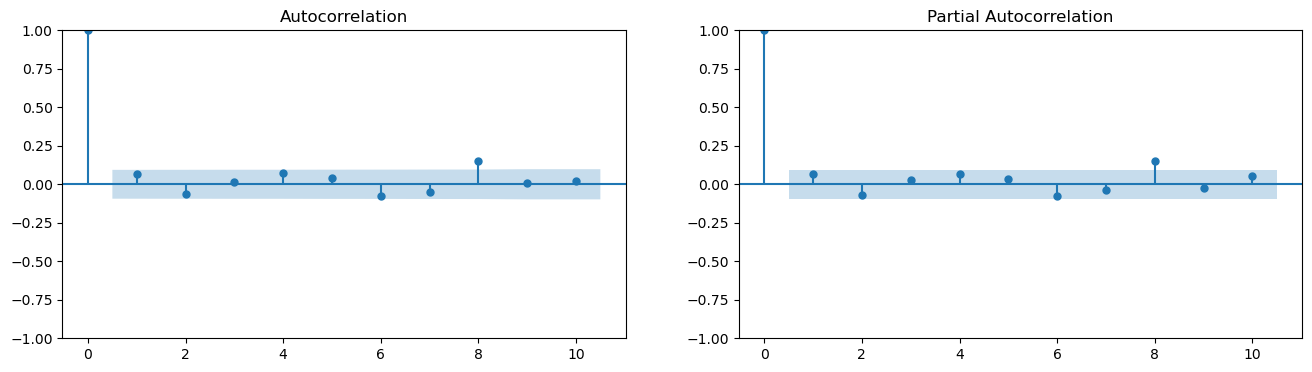

In [41]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(16, 4)
plot_acf(model.resid, lags=10, ax=axs[0]);
plot_pacf(model.resid, lags=10, ax=axs[1]);

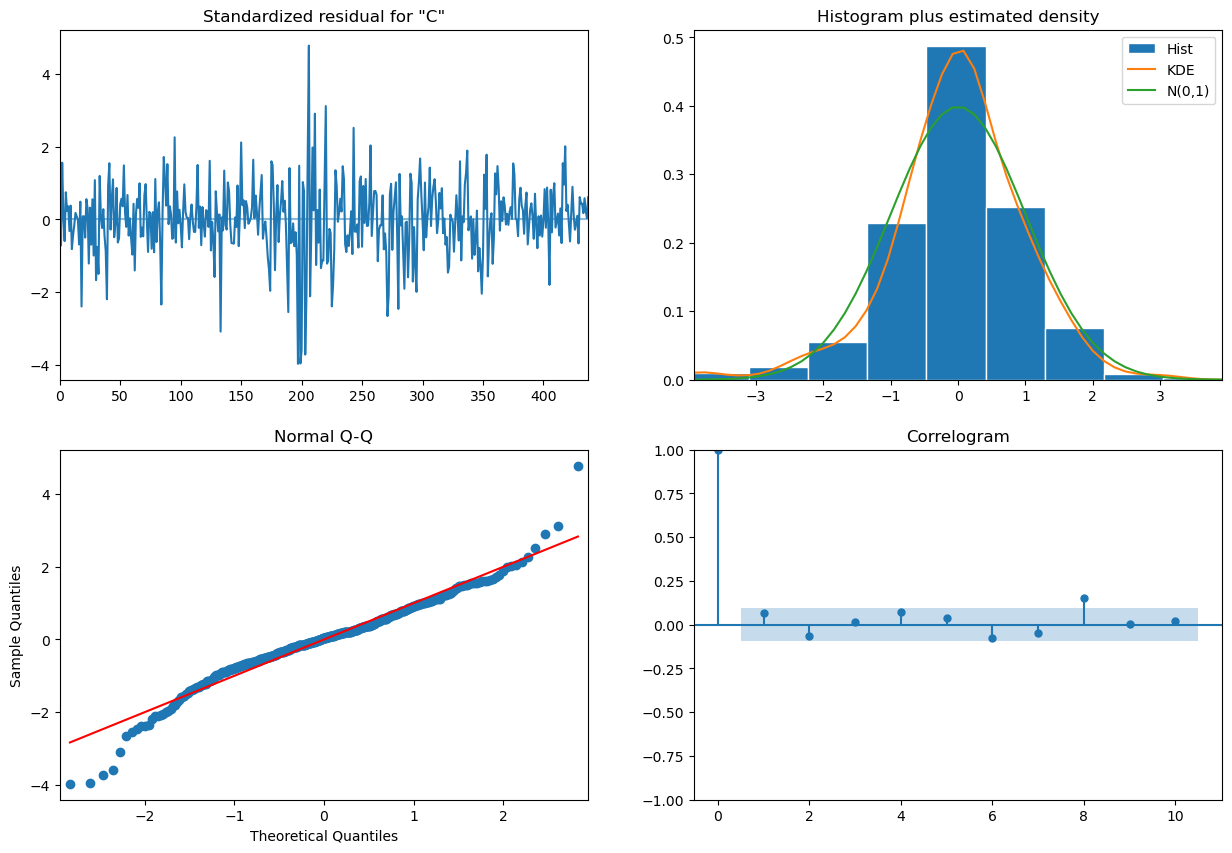

In [42]:
f = model.plot_diagnostics(figsize=(15,10))

In [43]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [44]:
acorr_ljungbox(model.resid, lags=[15], return_df=True)

,lb_stat,lb_pvalue
15,30.260483,0.011016


- p-value < 0.05, we can therefore reject the null hypothesis, indicating that the time series contains autocorrelation.
- the residuals of our time series model are not independent
- Not a good fit ...